<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Цели-и-описание" data-toc-modified-id="Цели-и-описание-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Цели и описание</a></span><ul class="toc-item"><li><span><a href="#Обзор-общей-информации-о-данных" data-toc-modified-id="Обзор-общей-информации-о-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Обзор общей информации о данных</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Устранение-пропущенных-значений" data-toc-modified-id="Устранение-пропущенных-значений-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Устранение пропущенных значений</a></span></li><li><span><a href="#Заполнение-пропусков-в-столбце-total_income" data-toc-modified-id="Заполнение-пропусков-в-столбце-total_income-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Заполнение пропусков в столбце <code>total_income</code></a></span></li><li><span><a href="#Заполнение-пропусков-в-столбце-days_employed" data-toc-modified-id="Заполнение-пропусков-в-столбце-days_employed-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Заполнение пропусков в столбце <code>days_employed</code></a></span></li><li><span><a href="#Обработка-дубликатов" data-toc-modified-id="Обработка-дубликатов-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Обработка дубликатов</a></span></li><li><span><a href="#Категоризация" data-toc-modified-id="Категоризация-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Категоризация</a></span></li></ul></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Проверка гипотез</a></span><ul class="toc-item"><li><span><a href="#Зависимость-между-количеством-детей-в-семье-и-возвратом-кредита-в-срок" data-toc-modified-id="Зависимость-между-количеством-детей-в-семье-и-возвратом-кредита-в-срок-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Зависимость между количеством детей в семье и возвратом кредита в срок</a></span></li><li><span><a href="#Зависимость-между-семейным-положением-и-возвратом-кредита-в-срок" data-toc-modified-id="Зависимость-между-семейным-положением-и-возвратом-кредита-в-срок-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Зависимость между семейным положением и возвратом кредита в срок</a></span></li><li><span><a href="#Зависимость-между-уровнем-дохода-и-возвратом-кредита-в-срок" data-toc-modified-id="Зависимость-между-уровнем-дохода-и-возвратом-кредита-в-срок-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Зависимость между уровнем дохода и возвратом кредита в срок</a></span></li><li><span><a href="#Влияние-разных-целей-кредита-на-его-возврат-в-срок" data-toc-modified-id="Влияние-разных-целей-кредита-на-его-возврат-в-срок-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Влияние разных целей кредита на его возврат в срок</a></span></li></ul></li><li><span><a href="#Итоги" data-toc-modified-id="Итоги-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Итоги</a></span></li></ul></div>

# Исследование надежности заемщиков

## Цели и описание

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.
Результаты исследования будут учтены при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

Цели исследования - ответить на следующие вопросы:

- Есть ли зависимость между количеством детей и возвратом кредита в срок?
- Есть ли зависимость между семейным положением и возвратом кредита в срок?
- Есть ли зависимость между уровнем дохода и возвратом кредита в срок?
- Как разные цели кредита влияют на его возврат в срок?

Для того, чтобы правильно ответить на эти вопросы, перед проверкой необходимо получить данные о заемщиках и очистить их от ошибок и аномалий.

### Обзор общей информации о данных

В этом разделе получим общую информацию о датафрейме и тех данных, которые в нем содержатся с помощью метода info. Определим, есть ли в данных пропущенные значения.

Импорт библиотек:

In [63]:
import pandas as pd
from IPython.display import display
import os
import matplotlib.pyplot as plt

Распакуем файл с данными. Укажем два пути для открытия файла локально и с сервера:

In [64]:
pth1 = r'C:\Users\HP\Desktop\Yandex Analytics\Projects\Project_2_investigation_of_borrowers_reliability\data.csv'
pth2 = '/datasets/data.csv'

if os.path.exists(pth1):
    df = pd.read_csv(pth1)
elif os.path.exists(pth2):
    df = pd.read_csv(pth2)
else:
    print('Something is wrong')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


В двух столбцах обнаружились пропущенные значения; это стобцы `days_employed` и `total_income`. Выведем на экран датасет для понимания, что за данные указаны в этих столбцах.

In [65]:
# выведем на экран первые 15 строк датасета для оценки
display(df.head(15))

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


На этом этапе видим, что пропущенные значения относятся к типу NaN, то есть на их месте должны стоять количественные значения. Помимо пропусков данных в таблице есть и другие проблемы:

- много отрицательных значений в столбце `days_employed` (дни трудового стажа);
- есть "выбросы": некоторые значения в столбце `days_employed` при переводе в годы дают нереалистичные значения (например: 340266 дней - 932 года);
- в столбце `education` категории написаны в разном регистре, возможно, это неявные дубликаты;
- данные в столбцах `days_employed` и `total_income` представлены как вещественные числа float, их сложно обрабатывать, лучше привести к целочисленному типу;

Разберемся с этим в следующем разделе.

## Предобработка данных

### Устранение пропущенных значений

Избавимся от пропущенных значений, чтобы они не мешали производить все остальные вычисления. Для начала определим, какую долю составляют строки с NaN от всего датасета:

In [66]:
# применим метод isna() для подсчета пропусков в столбце total_income
print(f'Количество строк с пропусками:',df['total_income'].isna().sum())

Количество строк с пропусками: 2174


Общее количество строк с NaN составляет 2174 на датасет из 21525 строк, что чуть больше 10% от всего массива. Посчитаем, чтобы убедиться - найдем долю строк с пропусками, разделив их количество на общее количество строк:

In [67]:
part_na = len(df[df['total_income'].isna()]) / len(df['total_income'])
print(f'Доля строк с пропусками в таблице: {part_na:.1%}')

Доля строк с пропусками в таблице: 10.1%


Количество пропущенных значений значительное. Если просто удалить эти строки, потеряем данные и в других столбцах, которые могут быть полезны при дальнейшей группировке. К тому же, удаление десятой части датасета скажется на дальнейших вычислениях и исказит результаты, поэтому заполним пропуски близкими по смыслу значениями.
Все пропущенные значения имеют тип NaN, т.е. на их месте должны быть числовые значения, поэтому имеет смысл заполнить пропуски медианным значением.

### Заполнение пропусков в столбце `total_income`

Если считать медиану по всему столбцу, то разброс значений все равно может быть довольно большим, и это исказит результаты. Для того, чтобы этого избежать, посчитаем медианное значение по каждому типу доходов. Проверим, так ли это.  
Выведем список уникальных значений из столбца `income_type` и определим общее количество заемщиков в каждой группе:

In [68]:
df['income_type'].value_counts()

сотрудник          11119
компаньон           5085
пенсионер           3856
госслужащий         1459
безработный            2
предприниматель        2
студент                1
в декрете              1
Name: income_type, dtype: int64

Теперь видно, что самая многочисленная группа - сотрудник. Вероятно, в эту группу входят люди, работающие на линейных позициях, со средними доходами, в отличие, например, от совладельцев бизнеса (компаньоны). Несмотря на общий признак по типу доходов, доходы внутри каждой из групп также могут быть абсолютно разными.  
Посчитаем медианное значение для каждой из групп. Для сравнения также рассчитаем среднее и соберем это в сводной таблице.

Выберем в качестве строк группу доходов, в качестве значений - общий доход, и рассчитаем медиану и среднее для каждой группы

In [69]:
df.pivot_table(index='income_type', values='total_income', aggfunc=['median','mean']).reset_index()

,income_type,median,mean
,,total_income,total_income
0,безработный,131339.751676,131339.751676
1,в декрете,53829.130729,53829.130729
2,госслужащий,150447.935283,170898.309923
3,компаньон,172357.950966,202417.461462
4,пенсионер,118514.486412,137127.465690
5,предприниматель,499163.144947,499163.144947
6,сотрудник,142594.396847,161380.260488
7,студент,98201.625314,98201.625314


Значения медианы и среднего не отличаются по группам "студент", "предприниматель", "безработный" и "в декрете", что логично, поскольку эти группы состоят из 1-2 человек.  
Значения среднего в самых многочисленных группах "сотрудник", "компаньон", "госслужащий" и "пенсионер" выше, чем медианные, что делает медиану более предпочтительной. При этом разница медианных значений между группами велика, и это подтверждает целесообразность заполнения пропусков медианой по группам, а не по всему столбцу.  
Так и поступим: заполним пропуски в столбце `total_income` медианными значениями по каждой из групп. Для этого можно воспользоваться лямбда-функцией, применив ее к сгруппированным значениям.

In [70]:
# сгруппируем заемщиков по типу доходов
income_type_grouped = df.groupby('income_type')
# для каждой группы используем метод fillna в столбце total_income, а в качестве аргумента передадим ему медиану
df['total_income'] = income_type_grouped.total_income.apply(lambda x: x.fillna(x.median()))

Проверим, что в столбце `total_income` не осталось пропусков и перейдем к обработке столбца `days_employed`. 

In [71]:
df['total_income'].isna().sum()

0

### Заполнение пропусков в столбце `days_employed`

При первоначальном выводе датафрейма в колонке с днями трудового стажа обнаружилось сразу несколько проблем:  
- пропуски значений,
- отрицательные значения,
- выбросы данных.  

Данные в этом столбце также относятся к количественному типу, а значит, заполнять их будем также расчетными значениями. Перед заполнением пропусков нужно избавиться от остальных аномалий, чтобы получить корректный результат.  
Для начала определим, сколько вообще строк с отрицательными значениями трудового стажа есть в нашей таблице:

In [72]:
df.loc[df['days_employed'] < 0]['days_employed'].count()

15906

Результат - больше половины строк. Можно предположить, что при выгрузке данных произошел технический сбой, который по какой-то причине сделал числа в столбце `days_employed` отрицательными, но скорее это проблема в расчете значений. Возможно, дни стажа рассчитывались как разница между текущим днем и днем первого приема на работу, и в этом случае можно было перепутать столбцы и  произвести вычитание в обратном порядке - из дня приема на работу вычесть текущий день.  
Поскольку нет возможности скорректировать выгрузку, переведем все отрицательные значения в положительные.  
Используем условие выше для исправления неправильных значений:

In [73]:
df.loc[df['days_employed'] < 0, 'days_employed'] *= (-1)

Теперь отрицательные значения в столбце `days_employed` заменены на те же самые значения по модулю. Проверим, что в таблице не осталось отрицательных значений, еще раз применив логическую индексацию:

In [74]:
df.loc[df['days_employed'] < 0]['days_employed'].count()

0

Теперь нужно разобраться с нетипичными значениями - слишком большими или слишком маленькими.   
Построим коробчатую диаграмму, чтобы увидеть, в каком диапазоне находятся выбросы:

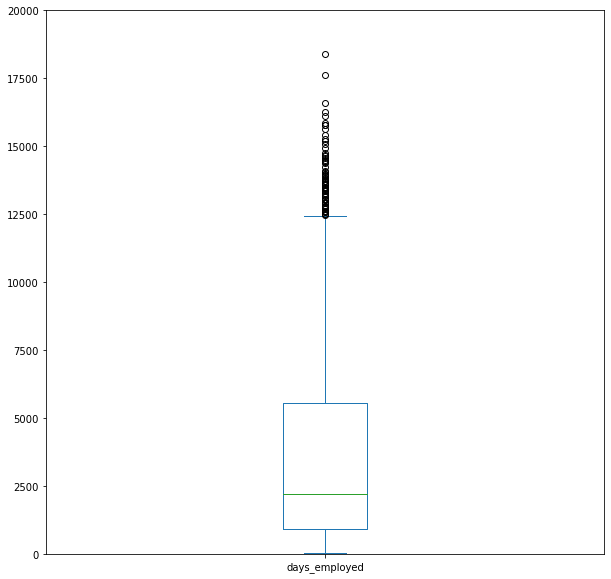

In [75]:
# df.boxplot('days_employed', figsize=(10,10))
df['days_employed'].plot(kind='box', figsize=(10,10), ylim=(0,20000))
plt.show()

Используем также метод `describe()` для получения полной информации о столбце:

In [76]:
df['days_employed'].describe()

count     19351.000000
mean      66914.728907
std      139030.880527
min          24.141633
25%         927.009265
50%        2194.220567
75%        5537.882441
max      401755.400475
Name: days_employed, dtype: float64

Из этих данных можем понять, что большая часть значений распределена в диапазоне до 5537 дней, четвертая часть значений - в диапазоне менее 927 дней. При этом видны резкие скачки в максимальных значениях.  
Посмотрим, в каких группах по типу доходов находятся выбросы: выведем список уникальных значений из `income_type` и посчитаем количество записей в каждой группе.

In [77]:
df.loc[df['days_employed'] > 300000]['income_type'].value_counts()

пенсионер      3443
безработный       2
Name: income_type, dtype: int64

Получили всего две строки: все люди с аномально большими значениями трудового стажа - пенсионеры (и двое безработных).  
Можно предположить, что при формировании таблицы не было данных / не было учтено прекращение трудовой деятельности, и стаж продолжил начисляться. Но поскольку цифры совсем не реалистичные, возможен и сбой: был использован формат чисел с плавающей точкой, и по каким-либо причинам изменилась разрядность чисел - точка сместилась ближе к концу или началу числа.  
Минимальные значения оставим как есть, потому что есть вероятность, что люди с такими показателями только начинают свою трудовую деятельность.  
Заменим значения. Медиану или среднее в данном случае использовать нельзя: вся группа пенсионеров, как мы определили ранее, составляет 3856 человек, и из них почти все имеют аномальные показатели стажа, а значит замена даст примерно то же самое значение.  
Воспользуемся официальными источниками: минимальный стаж для выхода на пенсию в России составляет 15 лет, что в пересчете на дни дает 5475. Это значение и будем использовать.

In [78]:
df.loc[df['days_employed'] > 300000,'days_employed'] = 5475
# Повторно вызовем метод describe() для проверки
df['days_employed'].describe()

count    19351.000000
mean      2908.813313
std       2406.367205
min         24.141633
25%        927.009265
50%       2194.220567
75%       5475.000000
max      18388.949901
Name: days_employed, dtype: float64

Видим, что показатели в столбце `days_employed` изменились. Оставим героев труда в покое и перейдем к замене пропущенных значений.  
Заменим пропуски аналогично тому, как это было сделано с `total_income`, на медианные значения по группам:

In [79]:
income_type_grouped = df.groupby('income_type')
df['days_employed'] = income_type_grouped.days_employed.apply(lambda x: x.fillna(x.median()))
# и проверим, что пропусков в столбце days_employed больше нет
df['days_employed'].isna().sum()

0

Все пропуски данных устранены. Приведем данные в столбцах `days_employed` и `total_income` к целочисленному типу методом `astype()`и выведем на экран первые 5 строк датафрейма.

In [80]:
df = df.astype({'days_employed':'int', 'total_income':'int'})
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля
2,0,5623,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование
4,0,5475,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу


### Обработка дубликатов

На этапе первичного просмотра уже было видно, что в таблице есть неявные дубликаты в столбце `education`, но не исключено, что есть и явные. Проверим наличие явных дубликатов методом `duplicated` и удалим, если таковые найдутся.  
Выведем список уникальных значений из столбца `education`:

In [81]:
# добавила проверку, потому что при удалении столбца в пункте 2.3 и повторном запуске кода появится ошибка
# попытка обращения к несуществующему имени
try:
    print(df['education'].value_counts())
except:
    print('Столбец удален. Чтобы увидеть исходное состояние, перезапустите ядро.')

среднее                13750
высшее                  4718
СРЕДНЕЕ                  772
Среднее                  711
неоконченное высшее      668
ВЫСШЕЕ                   274
Высшее                   268
начальное                250
Неоконченное высшее       47
НЕОКОНЧЕННОЕ ВЫСШЕЕ       29
НАЧАЛЬНОЕ                 17
Начальное                 15
ученая степень             4
Ученая степень             1
УЧЕНАЯ СТЕПЕНЬ             1
Name: education, dtype: int64


Приведем все категории к общему виду: запишем все в нижнем регистре и проверим, что получилось:

In [82]:
try:
    df['education'] = df['education'].str.lower()
    print(df['education'].value_counts())
except:
    print('Столбец удален. Чтобы увидеть исходное состояние, перезапустите ядро.')

среднее                15233
высшее                  5260
неоконченное высшее      744
начальное                282
ученая степень             6
Name: education, dtype: int64


In [83]:
df.duplicated().sum()

71

Удалим явные дубликаты:

In [84]:
df = df.drop_duplicates()
# проверим успешность
df.shape

(21454, 12)

Наличие разного регистра в столбце `education` наводит на подозрения о том, что подобное может быть и в других колонках. Проверим другие столбцы с категориальными значениями: `family_status`, `gender`, `purpose`:

In [85]:
try:
    print(df['family_status'].value_counts())
except:
    print('Столбец удален. Чтобы увидеть исходное состояние, перезапустите ядро.')

женат / замужем          12339
гражданский брак          4151
Не женат / не замужем     2810
в разводе                 1195
вдовец / вдова             959
Name: family_status, dtype: int64


Дублей нет, но один статус записан с большой буквы, приведем его тоже к нижнему регистру просто для красоты

In [86]:
df['family_status'] = df['family_status'].str.lower()

In [87]:
df['gender'].value_counts()

F      14174
M       7279
XNA        1
Name: gender, dtype: int64

Сюрприз: кто-то не указал пол. Других признаков, которые помогли бы определить пол, в таблице нет, и одна строка из 25 тысяч никак не повлияет на расчеты. Удалим ее, чтобы не смущала.

In [88]:
# получим индекс искомой строки
df.loc[df['gender'] == 'XNA'].index

Int64Index([10701], dtype='int64')

In [89]:
try:
    df = df.drop(labels=[10701],axis=0).reset_index(drop=True)
except:
    print('Строка удалена ранее')
# проверка
df['gender'].value_counts()

F    14174
M     7279
Name: gender, dtype: int64

Беспощадная статистика: женщин в таблице в два раза больше, чем мужчин. Теперь проверим столбец `purpose`, где указана цель кредита.

In [90]:
df['purpose'].value_counts()

свадьба                                   791
на проведение свадьбы                     768
сыграть свадьбу                           765
операции с недвижимостью                  675
покупка коммерческой недвижимости         661
операции с жильем                         652
покупка жилья для сдачи                   651
операции с коммерческой недвижимостью     650
покупка жилья                             646
жилье                                     646
покупка жилья для семьи                   638
строительство собственной недвижимости    635
недвижимость                              633
операции со своей недвижимостью           627
строительство жилой недвижимости          624
покупка недвижимости                      620
покупка своего жилья                      620
строительство недвижимости                619
ремонт жилью                              607
покупка жилой недвижимости                606
на покупку своего автомобиля              505
заняться высшим образованием      

По столбцу `purpose` получили длинный список целей, разных по написанию, но одинаковых по смыслу. Для того, чтобы сделать возможной классификацию, присвоим новые категории в зависимости от цели и сделаем это в следующем разделе.

### Категоризация

Добавим столбец, в который функция будет возвращать новую категорию в соответствии с заданным условием. На вход будет попадать строка, которая содержится в столбце `purpose`.

In [91]:
def make_purpose_category(string):
    '''
    Функция для категоризации
    
    Обрабатывает строки.
    Принимает на вход значение и присваивает категорию в зависимости от того, что указано в строке.
    Строительство выделено в отдельную категорию, т.к.этот процесс более сложный, долгий и часто более дорогой,
    чем покупка жилья
    '''
    if 'строит' in string:
        return 'строительство'
    if 'недвиж' in string:
        return 'операции с недвижимостью'
    if 'жиль' in string:
        return 'операции с недвижимостью'
    if 'авто' in string:
        return 'операции с автомобилем'
    if 'образован' in string:
        return 'получение образования'
    if 'свадьб' in string:
        return 'проведение свадьбы'
    else:
        return 'определите категорию'

In [92]:
# применяем функцию к столбцу 'purpose' и создаем новый столбец 'purpose_category'
df['purpose_category'] = df['purpose'].apply(make_purpose_category)
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,purpose_category
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,операции с недвижимостью
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,операции с автомобилем
2,0,5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,операции с недвижимостью
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,получение образования
4,0,5475,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,проведение свадьбы


Проверим, нет ли значений, для которых категория не определилась: выведем уникальные значения столбца 'purpose_category'

In [93]:
df['purpose_category'].value_counts()

операции с недвижимостью    8932
операции с автомобилем      4306
получение образования       4013
проведение свадьбы          2324
строительство               1878
Name: purpose_category, dtype: int64

В исходном датафрейме видно, что столбцы `education` и `family_status` дублируются аналогичными столбцами, в которых указаны соответствующие идентификаторы. Создадим словари для этих значений и удалим лишние колонки из таблицы.

In [94]:
education_dict = df[['education','education_id']].drop_duplicates().reset_index(drop=True)
education_dict

,education,education_id
0,высшее,0
1,среднее,1
2,неоконченное высшее,2
3,начальное,3
4,ученая степень,4


In [95]:
family_dict = df[['family_status','family_status_id']].drop_duplicates().reset_index(drop=True)
family_dict

,family_status,family_status_id
0,женат / замужем,0
1,гражданский брак,1
2,вдовец / вдова,2
3,в разводе,3
4,не женат / не замужем,4


In [96]:
df = df.drop(['education','family_status'],axis=1)
df.head()

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose,purpose_category
0,1,8437,42,0,0,F,сотрудник,0,253875,покупка жилья,операции с недвижимостью
1,1,4024,36,1,0,F,сотрудник,0,112080,приобретение автомобиля,операции с автомобилем
2,0,5623,33,1,0,M,сотрудник,0,145885,покупка жилья,операции с недвижимостью
3,3,4124,32,1,0,M,сотрудник,0,267628,дополнительное образование,получение образования
4,0,5475,53,1,1,F,пенсионер,0,158616,сыграть свадьбу,проведение свадьбы


Разделим заемщиков на группы по сумме общего дохода:  
- 0–30000 — 'E';
- 30001–50000 — 'D';
- 50001–200000 — 'C';
- 200001–1000000 — 'B';
- 1000001 и выше — 'A'

In [97]:
def make_income_category(income):
    '''
    Функция для категоризации
    
    Обрабатывает числовые значения и присваивает категорию в зависимости от дохода
    '''
    if income <= 30000:
        return 'E'
    if income <= 50000:
        return 'D'
    if income <= 200000:
        return 'C'
    if income <= 1000000:
        return 'B'
    return 'A'

df['total_income_category'] = df['total_income'].apply(make_income_category)
df.head()

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose,purpose_category,total_income_category
0,1,8437,42,0,0,F,сотрудник,0,253875,покупка жилья,операции с недвижимостью,B
1,1,4024,36,1,0,F,сотрудник,0,112080,приобретение автомобиля,операции с автомобилем,C
2,0,5623,33,1,0,M,сотрудник,0,145885,покупка жилья,операции с недвижимостью,C
3,3,4124,32,1,0,M,сотрудник,0,267628,дополнительное образование,получение образования,B
4,0,5475,53,1,1,F,пенсионер,0,158616,сыграть свадьбу,проведение свадьбы,C


Проверим, нет ли строк, где не определилась категория

In [98]:
df['total_income_category'].value_counts()

C    16015
B     5041
D      350
A       25
E       22
Name: total_income_category, dtype: int64

## Проверка гипотез

В этом разделе ответим на вопросы, поставленные в первом пункте.

### Зависимость между количеством детей в семье и возвратом кредита в срок

Проверим, есть ли взаимосвязь между этими показателями: предположим, что вероятность своевременного погашения кредита тем ниже, чем больше в семье детей.  
Для этого сгруппируем пользователей по количеству детей и рассчитаем долю заемщиков, имеющих задолженность, в каждой группе. Отобразим данные в сводной таблице для наглядного сравнения.

Определим, какие вообще значения есть столбце 'children':

In [99]:
df.groupby('children')['children'].count()

children
-1        47
 0     14090
 1      4808
 2      2052
 3       330
 4        41
 5         9
 20       76
Name: children, dtype: int64

Получили 47 отрицательных строк и 76 строк с 20-ю детьми. Вряд ли эти данные соответствуют действительности, но и их количество невелико относительно всего датафрейма. Цифра "20" могла появиться случайно, когда вносили значение "2" и нажали лишнюю клавишу, но наверняка это узнать невозможно, поэтому удалим эти строки.

Удалим строки по условию и еще раз выведем уникальные значения для проверки

In [100]:
df = df.drop(df.loc[(df['children'] == 20) | (df['children'] == (-1))].index)
df.groupby('children')['children'].count()

children
0    14090
1     4808
2     2052
3      330
4       41
5        9
Name: children, dtype: int64

Построим сводную таблицу с количеством детей в качестве строк и наличием задолженности в качестве столбцов, добавим столбец с долей должников относительно всех заемщиков в группе и добавим параметр fill_value для замены NaN на 0:

In [101]:
pivot_children = df.pivot_table(index='children', columns='debt', values='total_income', aggfunc='count',fill_value=0).reset_index()
pivot_children['percentage'] = (pivot_children[1] / pivot_children[0]) * 100
pivot_children.sort_values('percentage',ascending=False)

debt,children,0,1,percentage
4,4,37,4,10.810811
2,2,1858,194,10.441335
1,1,4364,444,10.174152
3,3,303,27,8.910891
0,0,13027,1063,8.159975
5,5,9,0,0.000000


Оказалось, что в группе с самым большим количеством детей самое маленькое количество должников, а точнее должников там вообще нет. Неожиданный результат, но это может быть связано с тем, что эта группа в целом очень малочисленная.  
Ожидаемо самый маленький процент должников среди заемщиков без детей, скорее всего, у них меньше дополнительных трат, что позволяет вовремя направлять требуемые суммы на погашение кредита.  
Можно было предположить, что с появлением детей и увеличением их количества растет и количество должников, но из этого ряда выбивается группа семей с тремя детьми - показатель там ниже, чем у семей с одним или двумя детьми.  
Можем сказать, что на вероятность возврата кредита в срок влияет наличие или отсутствие детей, а вот влияние количества не так выражено.

### Зависимость между семейным положением и возвратом кредита в срок

Построим сводную таблицу для поиска взаимосвязи и проверим утверждение: процент должников по кредитам меньше среди людей, состоящих в браке.

In [102]:
pivot_family = df.pivot_table(index='family_status_id', columns='debt', values='total_income', aggfunc='count',fill_value=0).reset_index()
# используем словарь для расшифровки семейного статуса
pivot_family['family_status_id'] = family_dict['family_status']
pivot_family['percentage'] = (pivot_family[1] / pivot_family[0]) * 100
pivot_family.sort_values('percentage',ascending=False)

debt,family_status_id,0,1,percentage
4,не женат / не замужем,2523,273,10.820452
1,гражданский брак,3748,385,10.272145
0,женат / замужем,11334,927,8.178931
3,в разводе,1105,84,7.601810
2,вдовец / вдова,888,63,7.094595


Самый маленький процент должников среди вдовцов и людей в разводе, но опять же, эти группы самые маленькие на общем фоне.  
Также небольшой процент в группе семейных людей, и это объяснимо, поскольку в семьях чаще объединяют доходы, что повышает суммарный доход и позволяет погашать кредит регулярно.  
Самый большой процент должников среди одиноких людей и людей в гражданском браке. Это также логично: пары, живущие в гражданском браке, часто имеют раздельный бюджет. Это же касается тех, кто имеет пару, в группе "не женат / не замужем".  

Также, на этот показатель может повлиять и то, что женщин в таблице в два раза больше, чем мужчин, как мы определили ранее. Женщины зачастую имеют меньший доход нежели мужчины по различным причинам, и это влияет на выплаты по кредитам. Давайте проверим - построим сводную таблицу по полу, рассчитаем медианный доход и определим процентное соотношение мужчин к женщинам:

In [103]:
pivot_gender = df.pivot_table(index='total_income_category',
                              columns='gender', values='total_income',
                              aggfunc={'median','count'}).reset_index()
pivot_gender['percentage'] = (pivot_gender['count']['M'] / (pivot_gender['count']['F']+pivot_gender['count']['M'])) * 100
pivot_gender

total_income_category    count             median            percentage
gender                              F       M          F          M           
0                          A     10.0    15.0  1197750.5  1278622.0  60.000000
1                          B   2695.0  2318.0   256248.0   259104.0  46.239777
2                          C  11063.0  4858.0   123907.0   142594.0  30.513159
3                          D    308.0    41.0    43754.5    44577.0  11.747851
4                          E     16.0     6.0    26973.5    22083.5  27.272727

Похоже, что в каждой группе содержится менее 40% мужчин, за исключением группы `A` с самым высоким доходом - там распределение обратное. В этой группе медианный доход мужчин немного выше. В следующей по уровню дохода группе `B` разница в доходах почти отсутствует, а в самой многочисленной группе `C` (средние доходы) значительная разница в доходах в пользу мужчин. В группе с небольшим доходом `D` разница снова небольшая, а в группе с минимальным доходом `E` женщины получают больше.  
Отсюда можем сделать два вывода:
- В целом преобладает разница в доходах в пользу мужчин, при увеличении доходов гендерные различия стираются;
- Женщины чаще берут на себя кредитные обязательства.

### Зависимость между уровнем дохода и возвратом кредита в срок

Проверим следующую гипотезу: чем выше совокупный уровень дохода, тем чаще заемщики вовремя погашают обязательства.

In [104]:
pivot_income = df.pivot_table(index='total_income_category', columns='debt', values='total_income', aggfunc='count').reset_index()
pivot_income['percentage'] = (pivot_income[1] / pivot_income[0]) * 100
pivot_income.sort_values('percentage',ascending=False)

debt,total_income_category,0,1,percentage
4,E,20,2,10.000000
2,C,14568,1353,9.287479
0,A,23,2,8.695652
1,B,4659,354,7.598197
3,D,328,21,6.402439


В целом можно сказать, что эта гипотеза подтвердилась: самые маленькие проценты должников в группах `B` (доход от 200 000 руб до 1000 000 руб) и `D` (доход от 30 000 до 50 000 руб). Но `D` не столь велика, как и группа `A` (доход свыше 1000 000 руб).  
Самый большой процент должников в группе `E` (доход до 30 000 руб), а также в группе `C` (от 50 000 до 200 000 руб).  
Самыми показательными можно считать все же группы `C` и `B` как самые крупные, и разница в количестве должников между ними составляет почти 1,5%.

### Влияние разных целей кредита на его возврат в срок

Посмотрим на взаимосвязь целей и своевременного погашения кредита и проверим, что она есть.

In [105]:
pivot_purpose = df.pivot_table(index='purpose_category', columns='debt', values='total_income', aggfunc='count').reset_index()
pivot_purpose['percentage'] = (pivot_purpose[1] / pivot_purpose[0]) * 100
pivot_purpose.sort_values('percentage',ascending=False)

debt,purpose_category,0,1,percentage
0,операции с автомобилем,3879,400,10.311936
2,получение образования,3619,369,10.196187
3,проведение свадьбы,2130,183,8.591549
4,строительство,1724,143,8.294664
1,операции с недвижимостью,8246,637,7.724958


Самые ответственные заемщики определенно находятся среди тех, кто берет кредит с целью приобретения жилья. Чуть больше должников среди тех, кто брал кредит с целью строительства, и это тоже объяснимо: само по себе строительство может быть затратнее и дольше, чем приобретение готового жилья. Похожая картина в группе тех, кто решил связать себя узами брака, в целом эта группа и группа строителей имеют средние показатели.  
Больше всего должников среди тех, кто берет кредит с целью приобретения автомобиля и тех, кто получает образование. Это также можно объяснить: хорошее образование требует крупных вложений, а получают его часто люди с небольшими и средними доходами, как раз для того, чтобы уровень дохода можно было повысить. Большой процент должников среди приобретающих авто может быть связан с условиями кредитования именно по автомобилям или с правилами взыскания задолженности.

## Итоги

Итак, в ходе исследования проверено четыре гипотезы, и по результатам проверки можно утверждать следующее:

- Первая гипотеза частично подтвердилась: есть зависимость между наличием детей в семье и возвратом кредита в срок. Меньше всего должников среди бездетных - 8,16%, а с появлением ребенка процент должников увеличивается до 10,17%. Но по остальным группам распределение достаточно хаотичное, хотя и есть тенденция к увеличению числа должников с увеличением количества детей в семье: 10,44% в группе семей с двумя детьми и 10,81% в группе с четырьмя. Однако при наличии большего количества данных о многодетных семьях, можно было бы получить более точный результат;  


- Вторая гипотеза подтвердилась: люди, состоящие в браке, реже имеют задолженности по кредитам, процент должников среди них составляет 8,18%. Минимальный процент должников среди людей со статусом "вдовец / вдова" и "в разводе" - 7,09% и 7,6% соответственно.  Больше всего должников среди одиноких людей - 10,82%, и немногим меньше среди людей в гражданском браке - 10,27%. Чаще кредитные обязательства берут на себя женщины - в выборке их 60%;


- Третья гипотеза подтвердилась частично: чем выше уровень дохода, тем больше вероятность погашения кредита в срок, но картину несколько искажает большая разница в доходах. Меньше всего должников среди людей с суммарным доходом от 200 000 руб до 1 000 000 руб (7,6%) и с доходом свыше 1 000 000 руб (8,7%). Среди людей с доходом менее 30 000 руб количество должников составляет 10%. Возможно, если изменить границы групп дохода, результат будет иным;  


- Четвертая гипотеза подтвердилась: цель кредита влияет на вероятность его своевременного погашения. Это может быть связано с конкретными условиями банковских ссуд. Меньше всего должников среди тех, кто берет кредит с целью приобретения жилья - 7,72%, а также, среди тех, кто планирует строительство - 8,29%. Самый большой процент в группе операций с автомобилем (покупка или ремонт) - 10,31%, и немногим меньше среди людей, планирующих получить образование - 10,2%. Среди тех, кто планирует свадьбу, процент должников составляет 8,59%.